<b>AML2019</b>

### Useful links

- [Lin reg on Boston Housing dataset](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)
- [Lin reg in sckit learn](https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/)
- [Train test split and cross validation](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)
- [Ridge and Lasso regression](https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b)
- [Best article in Boston House Pricing](https://gogul09.github.io/software/regression-example-boston-housing-prices)

In [69]:
from tqdm import tqdm # running time
import warnings
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns # plotting
from scipy import stats
from matplotlib import pyplot as plt # plots 

from sklearn.metrics import mean_squared_error
from sklearn.metrics.scorer import make_scorer

# display
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [70]:
traindataset = pd.read_csv("challenge_data/train.csv")
realtraindataset = pd.read_csv("challenge_data/clean_train_data.csv")
realtestdataset = pd.read_csv("challenge_data/clean_test_data.csv")

print("Original dataset")
print("Rows in dataset: ", traindataset.shape[0])
print("Colums in dataset: ",traindataset.shape[1])


print("One-hot encoded dataset" )
print("Rows in dataset: ", realtraindataset.shape[0])
print("Colums in dataset: ", realtraindataset.shape[1])

print("added " + str(realtraindataset.shape[1] - traindataset.shape[1])+ " columns with one-hot encoding")

print("Test dataset")
print("Rows in dataset: ", realtestdataset.shape[0])
print("Colums in dataset: ", realtestdataset.shape[1])

Original dataset
Rows in dataset:  1200
Colums in dataset:  81
One-hot encoded dataset
Rows in dataset:  1200
Colums in dataset:  253
added 172 columns with one-hot encoding
Test dataset
Rows in dataset:  260
Colums in dataset:  252


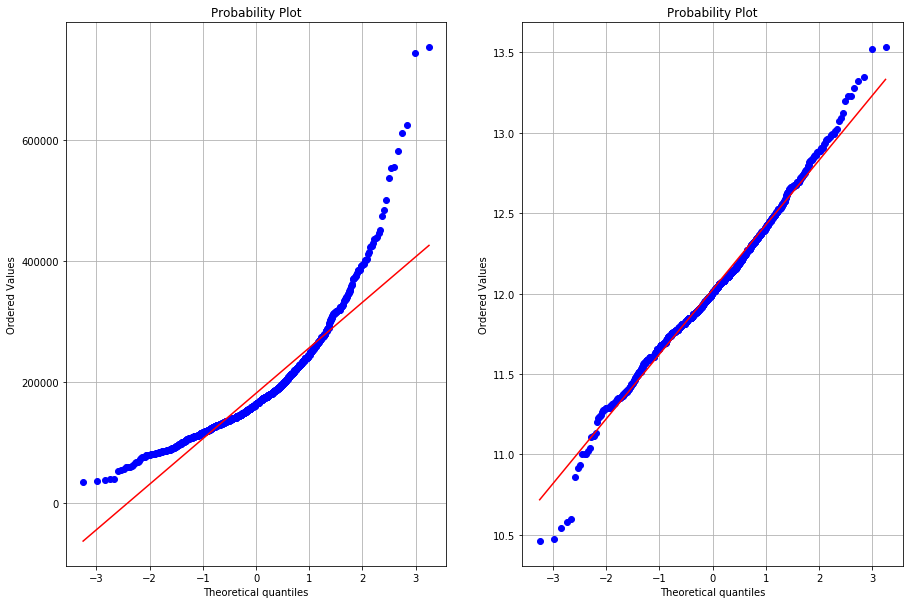

In [71]:
plt.figure(figsize=(15,10))

plt.subplot(121)
stats.probplot(realtraindataset.SalePrice, plot=plt)
plt.grid()

plt.subplot(122)
stats.probplot(np.log(realtraindataset.SalePrice), plot=plt)
plt.grid()

In [72]:
y = np.log(realtraindataset['SalePrice'])  # copies SalePrice to a new dataframe and make it Gaussian distrubuted
X = realtraindataset.drop(['LotFrontage', 'MasVnrArea','GarageYrBlt', 'SalePrice'], axis=1) # drops SalePrice from the training data. Also dropping LotFrontage and GarageYrBlt as they contain null values


print("Null values in dataset: ", X.isnull().sum().any()) # checks for null values
print(y.shape)
print(X.shape)
# allnum_prices = allnum_train['SalePrice'].copy() 

Null values in dataset:  False
(1200,)
(1200, 249)


Feature engineering

In [73]:
X['TotalSquareFeet'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
X = X.drop(['TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis=1) # drops old features

Functions used for hyperparameter optimazation selection

In [74]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(15,10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt
    
    
print("ok")

ok


In [75]:
from sklearn.model_selection import train_test_split

# Divide training set 

seed = 10
test_size = 0.20

#X_train, X_test, Y_train, Y_test  = train_test_split(allnum_train, allnum_prices, test_size = test_size, random_state = seed)

X_train, X_test, Y_train, Y_test  = train_test_split(X, y, test_size = test_size, random_state = seed)


print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(960, 247)
(240, 247)
(960,)
(240,)


In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error

#scoring function
def scoring_func(guess, predictions):
    difference = np.sqrt(mean_squared_error(guess,predictions))
    return difference

custom_scorer = make_scorer(scoring_func,greater_is_better=True)

# user variables to tune
folds   = 10
metric = "mean_squared_error"

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Lasso"]         = Lasso()
models["ElasticNet"]    = ElasticNet()
models["KNN"]           = KNeighborsRegressor()
models["DecisionTree"]  = DecisionTreeRegressor()
models["SVR"]           = SVR()
models["AdaBoost"]      = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"]  = RandomForestRegressor()
models["ExtraTrees"]    = ExtraTreesRegressor()

# 10-fold cross validation for each model
model_results = pd.DataFrame(columns=['ModelName', 'Mean', 'StandardDeviation'])
i = 0
for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=custom_scorer)
    #results = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring=metric)
    model_results.loc[i] = [model_name, round(results.mean(), 3), round(results.std(), 3)]
    i += 1


# box-whisker plot to compare regression models
'''figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results.Series.values)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
plt.show()'''

model_results.head(10)   

,ModelName,Mean,StandardDeviation
0,DecisionTree,0.230,0.032
1,KNN,0.239,0.022
2,GradientBoost,0.134,0.026
3,ElasticNet,0.174,0.037
4,RandomForest,0.158,0.026
5,ExtraTrees,0.153,0.027
6,SVR,0.406,0.034
7,AdaBoost,0.178,0.017
8,Linear,4266.232,6740.477
9,Lasso,0.181,0.040


GradientBoost is the best model. We will use hyperparameter optimazaton on the model to further strengthen our prediction

[INFO] MSE : 0.014


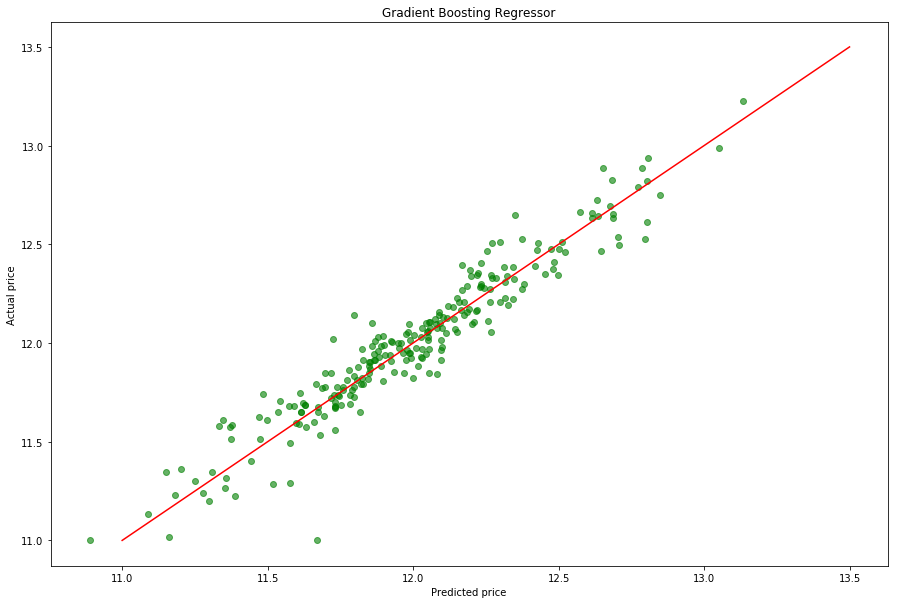

In [78]:
# Best model 
best_model = GradientBoostingRegressor()
best_model.fit(X_train,Y_train)

best_predictions = best_model.predict(X_test)
print("[INFO] MSE : {}".format(round(mean_squared_error(best_predictions, Y_test), 3)))

plt.figure(figsize=(15,10))
plt.scatter(best_predictions, Y_test, alpha=0.6, c='g')
plt.plot([11,13.5],[11,13.5],"r")
plt.xlabel("Predicted price")
plt.ylabel("Actual price")
plt.title("Gradient Boosting Regressor")
plt.show()

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py'>

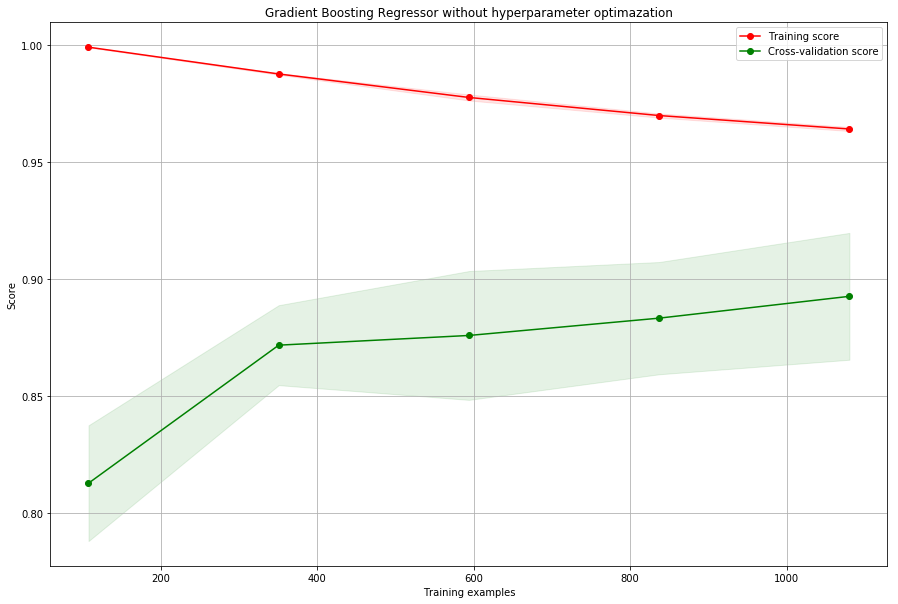

In [79]:
plot_learning_curve(best_model, "Gradient Boosting Regressor without hyperparameter optimazation", X, y, cv=10, n_jobs = 4)

In [83]:
from sklearn.grid_search import GridSearchCV

def hyperparameterOpt(estimator, params, cv, n_jobs=4):
    model_to_estimate = GridSearchCV(estimator = estimator, param_grid = params, cv = cv, n_jobs = n_jobs, verbose = 10)
    model_to_estimate.fit(X_train, Y_train)
    print("Best parameters from GridSearchCV: ", model.best_estimator_)
    return model_to_estimate.best_estimator_

param_grid = {'n_estimators':[100, 500, 1000],
              'learning_rate': [0.1, 0.05, 0.02],
              'max_depth':[4,6],
              'min_samples_leaf':[3,5,9], 
              'max_features':[1.0,0.3]
             }

model = GradientBoostingRegressor()
best_parameters = hyperparameterOpt(model, param_grid, cv = 10)



Fitting 10 folds for each of 108 candidates, totalling 1080 fits
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100 
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100 
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100 
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100, score=0.803046 -   0.9s
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100, score=0.916357 -   0.9s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100 
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100, score=0.914022 -   0.9s
[CV] learning_rate=0.1,

[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    1.8s


[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100, score=0.918214 -   0.9s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100, score=0.870041 -   0.9s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=500 


[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.7s


[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=500, score=0.794773 -   3.7s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=500, score=0.908984 -   3.9s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=500, score=0.921479 -   3.7s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=500, score=0.909169 -   3.8s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=500, score=0.888153 -   3.7s
[CV] learning_rate=0.1, min_samples_le

[Parallel(n_jobs=4)]: Done  17 tasks      | elapsed:   10.1s


[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=500, score=0.922373 -   3.7s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=500, score=0.875464 -   3.6s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000, score=0.791177 -   7.4s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000, score=0.909242 -   7.7s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000, score=0.908960 -   7.5s
[CV] learning_rate=0.1, min_sam

[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:   20.6s


[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000, score=0.888359 -   7.4s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000, score=0.825189 -   7.5s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000, score=0.879528 -   7.3s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000, score=0.874455 -   7.4s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100, score=0.802255 -   0.9s
[CV] learning_rate=0.1, min_samp

[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:   30.4s


[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100, score=0.885829 -   0.9s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100, score=0.878889 -   0.8s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100, score=0.914727 -   0.8s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100, score=0.875310 -   0.8s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000, score=0.921512 -   7.5s
[CV] learning_rate=0.1, min_samples_l

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   36.0s


[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=500, score=0.912200 -   3.6s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=500, score=0.880665 -   3.7s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=500, score=0.834284 -   3.6s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=500, score=0.885033 -   3.6s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=500, score=0.878663 -   3.7s
[CV] learning_rate=0.1, min_samples_l

[Parallel(n_jobs=4)]: Done  53 tasks      | elapsed:   50.5s


[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=1000, score=0.879209 -   7.3s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=1000, score=0.832039 -   7.5s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=1000, score=0.883711 -   7.0s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=1000, score=0.876278 -   7.3s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=100, score=0.819408 -   0.8s
[CV] learning_rate=0.1, min_samp

[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.0min


[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=100, score=0.887556 -   0.8s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=100, score=0.878904 -   0.8s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=100, score=0.907985 -   0.8s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=1000, score=0.911611 -   7.3s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=100, score=0.864940 -   0.8s
[CV] learning_rate=0.1, min_samples_l

[Parallel(n_jobs=4)]: Done  77 tasks      | elapsed:  1.2min


[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=500, score=0.909941 -   3.5s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=500, score=0.861709 -   3.5s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=1000, score=0.819972 -   7.3s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=1000, score=0.904717 -   7.3s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=1000, score=0.916799 -   7.1s
[CV] learning_rate=0.1, min_sam

[Parallel(n_jobs=4)]: Done  90 tasks      | elapsed:  1.4min


[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=100, score=0.914961 -   0.3s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=100, score=0.920468 -   0.3s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=100, score=0.891728 -   0.3s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=100, score=0.835121 -   0.3s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=100, score=0.903171 -   0.3s
[CV] learning_rate=0.1, min_samples_le

[Parallel(n_jobs=4)]: Done 105 tasks      | elapsed:  1.5min


[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=500, score=0.900682 -   1.4s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=500, score=0.887116 -   1.4s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=500, score=0.920153 -   1.4s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=500, score=0.908082 -   1.4s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000, score=0.809551 -   2.8s
[CV] learning_rate=0.1, min_sampl

[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed:  1.7min


[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=100, score=0.920105 -   0.3s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=100, score=0.899923 -   0.3s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=100, score=0.846706 -   0.3s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=100, score=0.914971 -   0.3s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=100, score=0.889587 -   0.3s
[CV] learning_rate=0.1, min_samples_le

[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:  1.7min


[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=500, score=0.879190 -   1.4s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=500, score=0.921423 -   1.4s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=500, score=0.886286 -   1.4s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=1000, score=0.821277 -   2.9s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=1000, score=0.908269 -   2.8s
[CV] learning_rate=0.1, min_samp

[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  1.9min


[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=100, score=0.888780 -   0.3s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=100, score=0.928544 -   0.3s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=100, score=0.891910 -   0.3s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=1000, score=0.907487 -   2.8s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=1000, score=0.893465 -   2.8s
[CV] learning_rate=0.1, min_samples_

[Parallel(n_jobs=4)]: Done 173 tasks      | elapsed:  2.0min


[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=1000, score=0.887284 -   2.8s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=1000, score=0.836146 -   2.7s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=1000, score=0.884660 -   2.7s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=1000, score=0.868229 -   2.7s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=100, score=0.787839 -   1.6s
[CV] learning_rate=0.1, min_samp

[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  2.2min


[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=500, score=0.896364 -   6.4s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=500, score=0.886533 -   6.6s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=500, score=0.887591 -   6.5s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=500, score=0.846119 -   6.4s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=500, score=0.871501 -   6.4s
[CV] learning_rate=0.1, min_samples_le

[Parallel(n_jobs=4)]: Done 213 tasks      | elapsed:  2.8min


[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=100, score=0.893222 -   1.5s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=100, score=0.848597 -   1.5s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=100, score=0.886678 -   1.4s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=100, score=0.863219 -   1.5s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=100, score=0.909782 -   1.4s
[CV] learning_rate=0.1, min_samples_le

[Parallel(n_jobs=4)]: Done 234 tasks      | elapsed:  3.3min


[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=1000, score=0.887911 -  10.2s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=1000, score=0.846004 -  10.0s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=1000, score=0.863858 -  10.1s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=1000, score=0.881880 -  10.4s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=100, score=0.910328 -   1.2s
[CV] learning_rate=0.1, min_samp

[Parallel(n_jobs=4)]: Done 257 tasks      | elapsed:  3.7min


[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=500, score=0.877775 -   6.0s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=500, score=0.855873 -   5.8s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=500, score=0.909963 -   5.8s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=1000, score=0.810257 -  11.8s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=1000, score=0.912383 -  11.7s
[CV] learning_rate=0.1, min_samp

[Parallel(n_jobs=4)]: Done 280 tasks      | elapsed:  4.3min


[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=1000, score=0.910103 -  11.5s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=1000, score=0.856976 -  11.8s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500, score=0.929411 -   2.4s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500, score=0.919986 -   2.5s
[CV] learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500, score=0.893845 -   2.5s
[CV] learning_rate=0.1, min_samples_

[Parallel(n_jobs=4)]: Done 305 tasks      | elapsed:  4.6min


[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=100, score=0.910215 -   0.5s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=100, score=0.872389 -   0.5s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=100, score=0.916649 -   0.5s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=1000, score=0.890329 -   3.5s
[CV] learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.1, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=100, score=0.876762 -   0.5s
[CV] learning_rate=0.1, min_samples_l

[Parallel(n_jobs=4)]: Done 330 tasks      | elapsed:  4.8min


[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100, score=0.915632 -   0.5s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100, score=0.918857 -   0.5s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100, score=0.895944 -   0.5s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100, score=0.859771 -   0.5s
[CV] learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100, score=0.888517 -   0.5s
[CV] learning_rate=0.1, min_samples_le

[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:  5.1min


[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100, score=0.793576 -   1.1s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100, score=0.894680 -   1.1s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100, score=0.902696 -   1.1s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100, score=0.912575 -   1.1s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.1, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=1000, score=0.908761 -   4.3s
[CV] learning_rate=0.05, min_

[Parallel(n_jobs=4)]: Done 384 tasks      | elapsed:  5.5min


[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000, score=0.885297 -   7.3s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000, score=0.822642 -   7.3s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000, score=0.882061 -   7.1s
[CV] learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000, score=0.871899 -   7.3s
[CV] learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100, score=0.793421 -   1.0s
[CV] learning_rate=0.05

[Parallel(n_jobs=4)]: Done 413 tasks      | elapsed:  6.0min


[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=1000, score=0.923127 -   7.2s
[CV] learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=1000, score=0.885055 -   7.1s
[CV] learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=1000, score=0.832700 -   7.3s
[CV] learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=1000, score=0.881800 -   7.1s
[CV] learning_rate=0.05, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=1000, score=0.878315 -   7.0s
[CV] learning_rate=0.

[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  6.4min


[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=1000, score=0.919036 -   7.2s
[CV] learning_rate=0.05, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=1000, score=0.915139 -   7.3s
[CV] learning_rate=0.05, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=1000, score=0.898577 -   7.0s
[CV] learning_rate=0.05, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=1000, score=0.834896 -   7.0s
[CV] learning_rate=0.05, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=1000, score=0.869503 -   7.0s
[CV] learning_rate=0

[Parallel(n_jobs=4)]: Done 473 tasks      | elapsed:  6.7min


[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000, score=0.925866 -   2.8s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000, score=0.886851 -   2.8s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000, score=0.838689 -   2.8s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000, score=0.901156 -   2.7s
[CV] learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000, score=0.888268 -   2.8s
[CV] learning_rate=0.

[Parallel(n_jobs=4)]: Done 504 tasks      | elapsed:  6.9min


[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=1000, score=0.891631 -   2.7s
[CV] learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=1000, score=0.846988 -   2.7s
[CV] learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=1000, score=0.899765 -   2.7s
[CV] learning_rate=0.05, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=100, score=0.810669 -   0.4s
[CV] learning_rate=0.05, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=1000, score=0.891387 -   2.7s
[CV] learning_rate=0.05

[Parallel(n_jobs=4)]: Done 537 tasks      | elapsed:  7.2min


[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=1000, score=0.923292 -   2.6s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=1000, score=0.902081 -   2.6s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=100, score=0.789108 -   2.0s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=100, score=0.890420 -   1.9s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=100, score=0.893526 -   2.0s
[CV] learning_rate=0.05, mi

[Parallel(n_jobs=4)]: Done 570 tasks      | elapsed:  8.0min


[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=100, score=0.899325 -   1.8s
[CV] learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=100, score=0.904116 -   1.8s
[CV] learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=100, score=0.883103 -   1.8s
[CV] learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=100, score=0.851935 -   1.8s
[CV] learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=100, score=0.881001 -   1.8s
[CV] learning_rate=0.05, min_

[Parallel(n_jobs=4)]: Done 605 tasks      | elapsed:  9.0min


[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=100, score=0.873041 -   1.6s
[CV] learning_rate=0.05, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=1000, score=0.910277 -  12.0s
[CV] learning_rate=0.05, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=100, score=0.903161 -   1.6s
[CV] learning_rate=0.05, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=1.0, n_estimators=1000, score=0.854851 -  12.2s
[CV] learning_rate=0.05, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=100, score=0.857772 -   1.7s
[CV] learning_rate=0.05, mi

[Parallel(n_jobs=4)]: Done 640 tasks      | elapsed:  9.7min


[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=1000, score=0.909184 -  11.8s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=1000, score=0.855507 -  11.8s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500, score=0.921835 -   2.4s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500, score=0.917361 -   2.4s
[CV] learning_rate=0.05, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.05, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500, score=0.898909 -   2.5s
[CV] learning_rate=0.05, mi

[Parallel(n_jobs=4)]: Done 677 tasks      | elapsed: 10.1min


[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=500, score=0.923808 -   2.3s
[CV] learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=500, score=0.895630 -   2.4s
[CV] learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=1000, score=0.912121 -   4.6s
[CV] learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=1000, score=0.813442 -   4.6s
[CV] learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=5, max_depth=6, max_features=0.3, n_estimators=1000, score=0.916400 -   4.5s
[CV] learning_rate=0.0

[Parallel(n_jobs=4)]: Done 714 tasks      | elapsed: 10.5min


[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=1000, score=0.857045 -   4.2s
[CV] learning_rate=0.05, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=1000, score=0.889444 -   4.3s
[CV] learning_rate=0.05, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=1000, score=0.882138 -   4.0s
[CV] learning_rate=0.02, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.05, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=1000, score=0.906219 -   4.2s
[CV] learning_rate=0.02, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=100, score=0.740294 -   1.1s
[CV] learning_rate=0.02

[Parallel(n_jobs=4)]: Done 753 tasks      | elapsed: 11.2min


[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000, score=0.926409 -   7.6s
[CV] learning_rate=0.02, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=4, max_features=1.0, n_estimators=1000, score=0.865951 -   7.4s
[CV] learning_rate=0.02, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.02, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100, score=0.856924 -   1.2s
[CV] learning_rate=0.02, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.02, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100, score=0.816733 -   1.2s
[CV] learning_rate=0.02, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.02, min_samples_leaf=5, max_depth=4, max_features=1.0, n_estimators=100, score=0.878356 -   1.1s
[CV] learning_rate=0.02, mi

[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 11.8min


[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=500, score=0.917845 -   4.0s
[CV] learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=500, score=0.919863 -   4.2s
[CV] learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=500, score=0.900436 -   4.0s
[CV] learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=500, score=0.846104 -   4.2s
[CV] learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=500 
[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=1.0, n_estimators=500, score=0.882310 -   4.1s
[CV] learning_rate=0.02, min_

[Parallel(n_jobs=4)]: Done 833 tasks      | elapsed: 12.4min


[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000, score=0.923358 -   2.8s
[CV] learning_rate=0.02, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000, score=0.895979 -   2.8s
[CV] learning_rate=0.02, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000, score=0.903388 -   2.8s
[CV] learning_rate=0.02, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=4, max_features=0.3, n_estimators=1000, score=0.855577 -   2.9s
[CV] learning_rate=0.02, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.02, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=100, score=0.748111 -   0.4s
[CV] learning_rate=0.0

[Parallel(n_jobs=4)]: Done 874 tasks      | elapsed: 12.7min


[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=100, score=0.853090 -   0.4s
[CV] learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=100, score=0.819562 -   0.4s
[CV] learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.02, min_samples_leaf=5, max_depth=4, max_features=0.3, n_estimators=1000, score=0.897368 -   2.9s
[CV] learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=100, score=0.871576 -   0.4s
[CV] learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=4, max_features=0.3, n_estimators=100, score=0.852095 -   0.4s
[CV] learning_rate=0.02, min

[Parallel(n_jobs=4)]: Done 917 tasks      | elapsed: 13.2min


[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=500, score=0.864240 -   8.1s
[CV] learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=500, score=0.876296 -   7.7s
[CV] learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=500, score=0.846989 -   7.6s
[CV] learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=1000, score=0.791421 -  13.5s
[CV] learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=1000 
[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=1.0, n_estimators=1000, score=0.892979 -  13.5s
[CV] learning_rate=0.02

[Parallel(n_jobs=4)]: Done 960 tasks      | elapsed: 14.7min


[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=100, score=0.864942 -   1.8s
[CV] learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=100, score=0.865324 -   1.8s
[CV] learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=100, score=0.871510 -   1.8s
[CV] learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=100, score=0.838392 -   1.8s
[CV] learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=100 
[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=1.0, n_estimators=100, score=0.856963 -   1.8s
[CV] learning_rate=0.02, min_

[Parallel(n_jobs=4)]: Done 1005 tasks      | elapsed: 15.7min


[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500, score=0.859338 -   2.9s
[CV] learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500 
[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500, score=0.899473 -   2.8s
[CV] learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500, score=0.882215 -   2.7s
[CV] learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500, score=0.914784 -   2.8s
[CV] learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=1000 
[CV]  learning_rate=0.02, min_samples_leaf=3, max_depth=6, max_features=0.3, n_estimators=500, score=0.898207 -   2.9s
[CV] learning_rate=0.02, m

[Parallel(n_jobs=4)]: Done 1050 tasks      | elapsed: 16.3min


[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100, score=0.876224 -   0.7s
[CV] learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100, score=0.880004 -   0.7s
[CV] learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100, score=0.873701 -   0.7s
[CV] learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100, score=0.844016 -   0.7s
[CV] learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100 
[CV]  learning_rate=0.02, min_samples_leaf=9, max_depth=6, max_features=0.3, n_estimators=100, score=0.853991 -   0.7s
[CV] learning_rate=0.02, min_

[Parallel(n_jobs=4)]: Done 1080 out of 1080 | elapsed: 16.6min finished


AttributeError: 'GradientBoostingRegressor' object has no attribute 'best_estimator_'